<a href="https://colab.research.google.com/github/marthaakinlolu/DataScience/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [154]:
def h(x, theta):

    # Compute the dot product between theta and x to get the predicted output
    y_pred = np.dot(x, theta.reshape(-1, 1))
    
    return y_pred

In [155]:
def mean_squared_error(y_predicted, y_label):
    
    # Compute the MSE between the predicted values and the labels
    mse = np.mean((y_predicted - y_label) ** 2)
    
    return mse

In [156]:
class LeastSquaresRegression():
    def __init__(self):
        self.theta_ = None
        
    def fit(self, X, y):
        
        # Compute the model parameters using the normal equation
        self.theta_ = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        
        
    def predict(self, X):
        
        # Compute the predicted output using the learned model parameters
        y_pred = h(X,self.theta_)
        
        return y_pred

In [157]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

In [158]:
def bias_column(X):
    """
    Add a bias column of ones to the input features.
    
    Args:
    - X: a numpy array of shape (m, n_features), representing the input features
    
    Returns:
    - X_bias: a numpy array of shape (m, n_features + 1), representing the input features with an added bias column of ones
    """
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_bias = np.concatenate((ones, X), axis=1)
    return X_bias

In [159]:
X_new = bias_column(X)

print(X[:5])
print(" ---- ")
print(X_new[:5])

[[2.68586778]
 [2.79521909]
 [3.54028527]
 [0.55775473]
 [2.67886907]]
 ---- 
[[1.         2.68586778]
 [1.         2.79521909]
 [1.         3.54028527]
 [1.         0.55775473]
 [1.         2.67886907]]


In [160]:
model = LeastSquaresRegression()
model.fit(X_new, y)

print(model.theta_)

[[10.3433636 ]
 [ 1.91607015]]


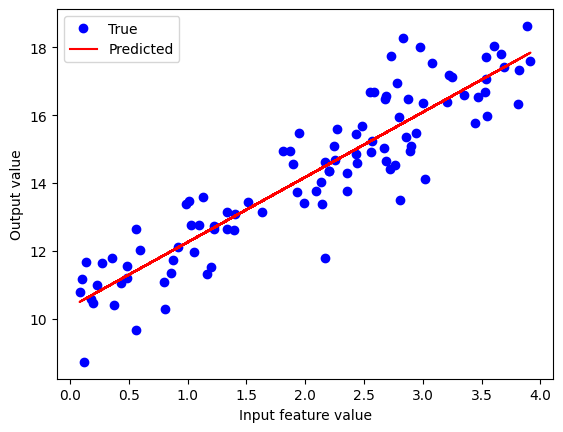

In [161]:
y_new = model.predict(X_new)

def my_plot(X, y, y_new):
    # create a new figure
    plt.figure()
    # plot the true output values as blue circles
    plt.plot(X, y, 'bo', label='True')
    # plot the predicted output values as a red line
    plt.plot(X, y_new, 'r-', label='Predicted')
    # set the x and y labels
    plt.xlabel('Input feature value')
    plt.ylabel('Output value')
    # add a legend
    plt.legend()
    # show the plot
    plt.show()

# def my_plot(X, y, y_new):
#     # plot the true labels as blue circles
#     plt.scatter(X, y, color='blue', label='True labels')
#     # plot the predicted values as red triangles
#     plt.scatter(X, y_new, color='red', marker='^', label='Predicted values')
#     plt.legend()
#     plt.show()


my_plot(X, y, y_new)

In [162]:
class GradientDescentOptimizer():
    def __init__(self, f, fprime, start, learning_rate=0.1):
        self.f_ = f                          # The function
        self.fprime_ = fprime                # The gradient of f
        self.current_ = start               # The current point being evaluated
        self.learning_rate_ = learning_rate  # Learning rate for gradient descent
        
        # Save history as attributes
        self.history_ = [start]
    
    def step(self):
        # Take a gradient descent step
        gradient = self.fprime_(self.current_)
        self.current_ = self.current_ - self.learning_rate_ * gradient
        self.history_.append(self.current_)
        
    def optimize(self, iterations=1000):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        for i in range(iterations):
            self.step()

    def getCurrentValue(self):
        # Getter for current_
        return self.current_

    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))
        
    def plot_gradient_history(self):
        # Plot the gradient history
        plt.plot(range(len(self.history_)), self.history_)
        plt.xlabel('Iteration')
        plt.ylabel('Value of theta')
        plt.title('Progression of Gradient Descent')
        plt.show()

In [163]:
# def f(x):
#     return 3 + np.dot(x - np.array([2, 6]), x - np.array([2, 6]))

def f(x):
    a = np.array([2, 6])
    return 3 + np.dot(x - a, x - a)

# def f(X, y, theta):
#     n = len(y)
#     return (1 / (2 * n)) * np.sum((X.dot(theta) - y) ** 2)

In [164]:
def fprime(x):
    a = np.array([2, 6])
    return 2 * (x - a)



# def fprime(X, y, theta):
#     n = len(y)
#     return 2 * X.T.dot(X.dot(theta) - y) / n

Best theta found is [1.72658435 5.21562564]
Value of f at this theta: f(theta) = 3.689999254554281
Value of f prime at this theta: f'(theta) = [-0.54683131 -1.56874872]


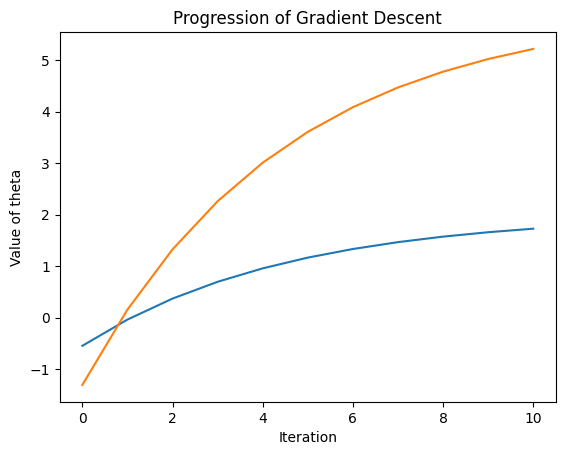

In [165]:
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()
grad.plot_gradient_history()

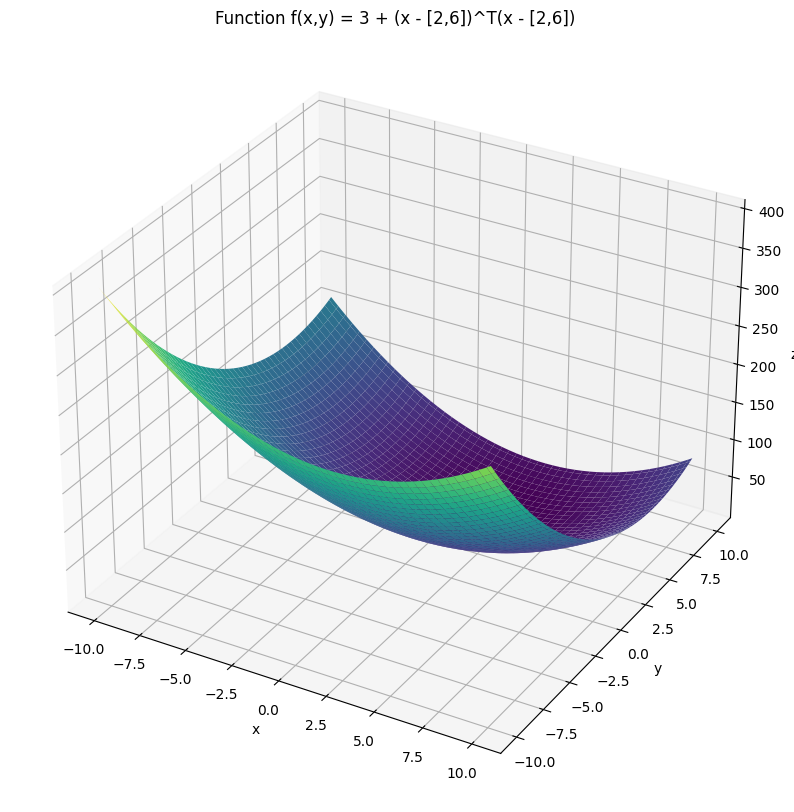

In [166]:
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute the value of f for each (x,y) pair
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = f(np.array([X[i,j], Y[i,j]]))

# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function f(x,y) = 3 + (x - [2,6])^T(x - [2,6])')
plt.show()